# İris Veri Seti üç Farklı Modelleme ile 

## 1-) Karar Ağacı Yöntemi İle İlgili

In [16]:
# Gerekli Kütüphanelerin Eklenmesi
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.target)
print(iris.data)



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8

In [17]:
# Data Frame Oluşturma 
df_iris = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Test ve Eğitim Verileri Olarak Ayırma 

from sklearn.model_selection import train_test_split # Test ve veri seti olarak ayırmak için gerekli kütüphane

X = iris.data # Giriş Değerlerimiz Yani Elimizdeki Veri
y = iris.target # Çıkış Değerlerimiz Yani Etiketlerimzi

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print(f"Modelin Doğru Sonuçları Bilerek Yaptığı Eğitim Seti Giriş Ve Çıkış Değerleri Boyutu")
print(f"Eğitim Veri Seti Giriş Değerleri Boyutu: ", len(X_train))
print(f"Eğitim Veri Seti Çıkış Değerleri Boyutu", len(y_train))
print("\n")
print(f"Modelin Doğru Sonuçları Bilmeden Yaptığı Test Seti Giriş Ve Çıkış Değerleri Boyutu")
print(f"Eğitim Veri Seti Giriş Değerleri Boyutu: ", len(X_test))
print(f"Eğitim Veri Seti Çıkış Değerleri Boyutu", len(y_test))



Modelin Doğru Sonuçları Bilerek Yaptığı Eğitim Seti Giriş Ve Çıkış Değerleri Boyutu
Eğitim Veri Seti Giriş Değerleri Boyutu:  120
Eğitim Veri Seti Çıkış Değerleri Boyutu 120


Modelin Doğru Sonuçları Bilmeden Yaptığı Test Seti Giriş Ve Çıkış Değerleri Boyutu
Eğitim Veri Seti Giriş Değerleri Boyutu:  30
Eğitim Veri Seti Çıkış Değerleri Boyutu 30


In [19]:
# Kullanılacak Modelin Seçilmesi 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

#Model Fit Komutu İle Model Eğitiminin Başlangıcı
model.fit(X_train, y_train)

#Modelin X_test üzerindeki tahminlerini y_predict diye bir değişkene aktardık 
y_predict = model.predict(X_test)

<Axes: >

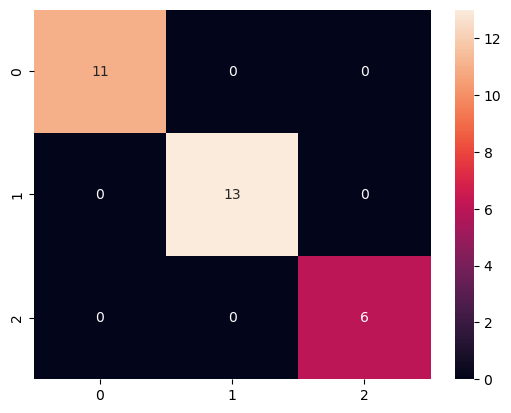

In [20]:
#Eveet Şimdi Karşılaştırma Kısmına gelik yani y_predict ile y_test arasındaki farklara bakacağız

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_matrix, annot=True)



# K Nearest Neighbor(KNN) Algoritması İle İris Veri Seti İncelenmesi

In [24]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris.target)
print(iris.data)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8

In [27]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Modelin Doğru Sonuçları Bilerek Yaptığı Eğitim Seti Giriş Ve Çıkış Değerleri Boyutu")
print(f"Eğitim Veri Seti Giriş Değerleri Boyutu: ", len(X_train))
print(f"Eğitim Veri Seti Çıkış Değerleri Boyutu", len(y_train))
print("\n")
print(f"Modelin Doğru Sonuçları Bilmeden Yaptığı Test Seti Giriş Ve Çıkış Değerleri Boyutu")
print(f"Eğitim Veri Seti Giriş Değerleri Boyutu: ", len(X_test))
print(f"Eğitim Veri Seti Çıkış Değerleri Boyutu", len(y_test))

Modelin Doğru Sonuçları Bilerek Yaptığı Eğitim Seti Giriş Ve Çıkış Değerleri Boyutu
Eğitim Veri Seti Giriş Değerleri Boyutu:  120
Eğitim Veri Seti Çıkış Değerleri Boyutu 120


Modelin Doğru Sonuçları Bilmeden Yaptığı Test Seti Giriş Ve Çıkış Değerleri Boyutu
Eğitim Veri Seti Giriş Değerleri Boyutu:  30
Eğitim Veri Seti Çıkış Değerleri Boyutu 30


In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

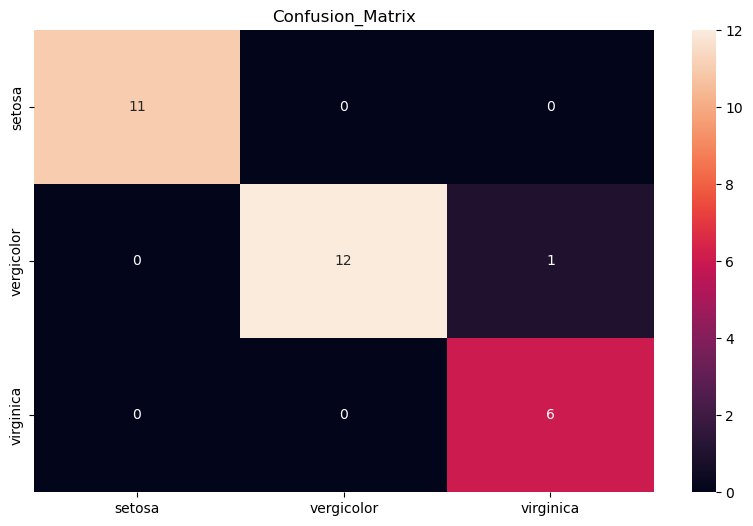

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, y_predict)

index = ['setosa','vergicolor','virginica']
columns = ['setosa','vergicolor','virginica']
hata_goster_df = pd.DataFrame(confusion_matrix, columns=columns, index=index)


plt.figure(figsize = (10,6))
plt.title("Confusion_Matrix")
sns.heatmap(hata_goster_df, annot = True);



# Sport Vector Machine İle İris Veri Setinin İncelenmesi

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.target)
print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8

In [12]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Modelin Doğru Sonuçları Bilerek Yaptığı Eğitim Seti Giriş Ve Çıkış Değerleri Boyutu")
print(f"Eğitim Veri Seti Giriş Değerleri Boyutu: ", len(X_train))
print(f"Eğitim Veri Seti Çıkış Değerleri Boyutu: ", len(y_train))
print("\n")
print(f"Modelin Doğru Sonuçları Bilmeden Yaptığı Test Seti Giriş Ve Çıkış Değerleri Boyutu")
print(f"Eğitim Veri Seti Giriş Değerleri Boyutu: ", len(X_test))
print(f"Eğitim Veri Seti Çıkış Değerleri Boyutu: ", len(y_test))

Modelin Doğru Sonuçları Bilerek Yaptığı Eğitim Seti Giriş Ve Çıkış Değerleri Boyutu
Eğitim Veri Seti Giriş Değerleri Boyutu:  120
Eğitim Veri Seti Çıkış Değerleri Boyutu:  120


Modelin Doğru Sonuçları Bilmeden Yaptığı Test Seti Giriş Ve Çıkış Değerleri Boyutu
Eğitim Veri Seti Giriş Değerleri Boyutu:  30
Eğitim Veri Seti Çıkış Değerleri Boyutu:  30


In [13]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

SVC()

In [14]:
from sklearn.metrics import accuracy_score

train_predict = model.predict(X_train)
accuracy_train = accuracy_score(train_predict, y_train)
print(f"Train of accuracy: ", {accuracy_train})

test_predict = model.predict(X_test)
accuracy_test = accuracy_score(test_predict, y_test)
print(f"Test of accuracy: ", {accuracy_train})

Train of accuracy:  {0.9583333333333334}
Test of accuracy:  {0.9583333333333334}


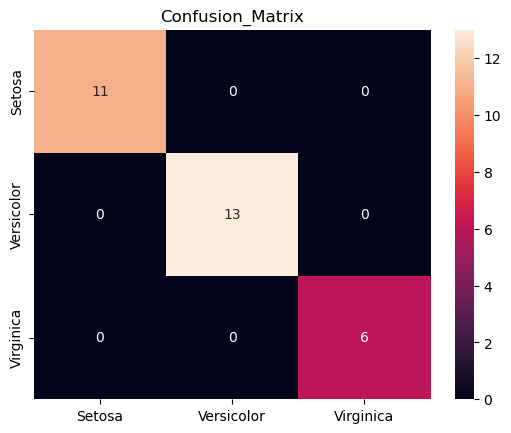

<Figure size 1000x600 with 0 Axes>

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matris = confusion_matrix(test_predict, y_test)

index = ['Setosa','Versicolor','Virginica']
columns = ['Setosa','Versicolor','Virginica']

import pandas as pd
hata_goster_df = pd.DataFrame(confusion_matris, columns, index)

import matplotlib.pyplot as plt
import seaborn as sns 
sns.heatmap(hata_goster_df, annot = True);
plt.title("Confusion_Matrix");
plt.figure(figsize=(10,6));